### Proprietà dei rendimenti finanziari giornalieri
- I rendimenti giornalieri presentano autocorrelazione bassa o nulla
- La distribuzione non condizionata dei rendimenti giornalieri ha valori estremi alti o bassi più frequenti di quanto non sarebbe previsto da una distribuzione normale (kurtosi maggiore di 3) <br> <br>
__PER CAPIRE__: la kurtosi è una misura della "pesantezza" delle code della distribuzione; kurtosi pari a 3 significa che la distribuzione ha code più spesse rispetto ad una distribuzione normale. <br> <br>
- si verifica che valori estremi negativi hanno maggiore frequenza di valori estremi positivi, perciò la distribuzione è asimmetrica (indice di asimmetria o "skew" minore di 0) <br> <br>
__PER CAPIRE__: la coda sinistra della distribuzione è più lunga e pesante della destra; un indice di asimmetria negativo indica una tendenza della distribuzione ad estendersi più verso sinistra che destra. <br> <br>
- la dimensione della volatilità dei rendimenti, misurata dalla deviazione standard, domina quella dei rendimenti <br> <br>
__PER CAPIRE__: la variazione della volatilità dei rendimenti è più significativa o determinante rispetto alla variazione dei rendimenti stessi. <br> <br>
- la varianza, misurata dal quadrato dei rendimenti, presenta autocorrelazione con i valori passati
- nel mercato azionario si riscontra una relazione negativa fra rendimenti e varianza, momenti di elevata volatilità sono associati a rendimenti negativi
- allungando l'orizzonte temporale la distribuzione dei rendimenti diventa più vicina a quella normale



Fonte: Christoffersen P. (2003) Elements of Financial Risk Management, Academic Press


In [145]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import yfinance as yf
%matplotlib inline

In [146]:
start = datetime.datetime(1982,12, 31)
end = datetime.datetime(2023, 12, 31)

In [147]:
SP500 = pd.read_csv('SP500.csv', index_col = 0, parse_dates = True)

In [148]:
SP500.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1982-12-31,140.339996,140.779999,140.270004,140.639999,140.639999,42110000
1983-01-03,140.649994,141.330002,138.199997,138.339996,138.339996,59080000
1983-01-04,138.330002,141.360001,138.080002,141.360001,141.360001,75530000
1983-01-05,141.350006,142.600006,141.149994,141.960007,141.960007,95390000
1983-01-06,142.009995,145.770004,142.009995,145.270004,145.270004,129410000


In [149]:
#SP500 = yf.download('^GSPC', start, end)

In [150]:
SP500['RS_Netto'] = SP500['Adj Close'].pct_change()
SP500['RS_Netto'].head()

Date
1982-12-31         NaN
1983-01-03   -0.016354
1983-01-04    0.021830
1983-01-05    0.004245
1983-01-06    0.023316
Name: RS_Netto, dtype: float64

#### I rendimenti giornalieri presentano autocorrelazione bassa o nulla

In [151]:
Autocorr = []
for i in range(1,100):
    x = SP500['RS_Netto'].autocorr(lag=i)
    Autocorr.append(x)

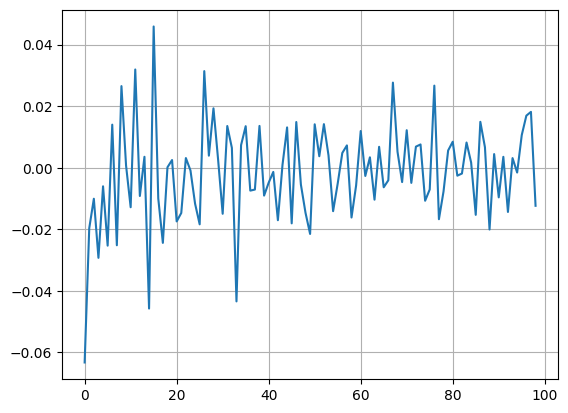

In [152]:
plt.plot(Autocorr)
plt.grid()

In [153]:
np.mean(Autocorr)

-0.0017822115624974058

#### La distribuzione non condizionata dei rendimenti giornalieri ha valori estremi alti o bassi più frequenti di quanto non sarebbe previsto da una distribuzione normale (kurtosi maggiore di 3)

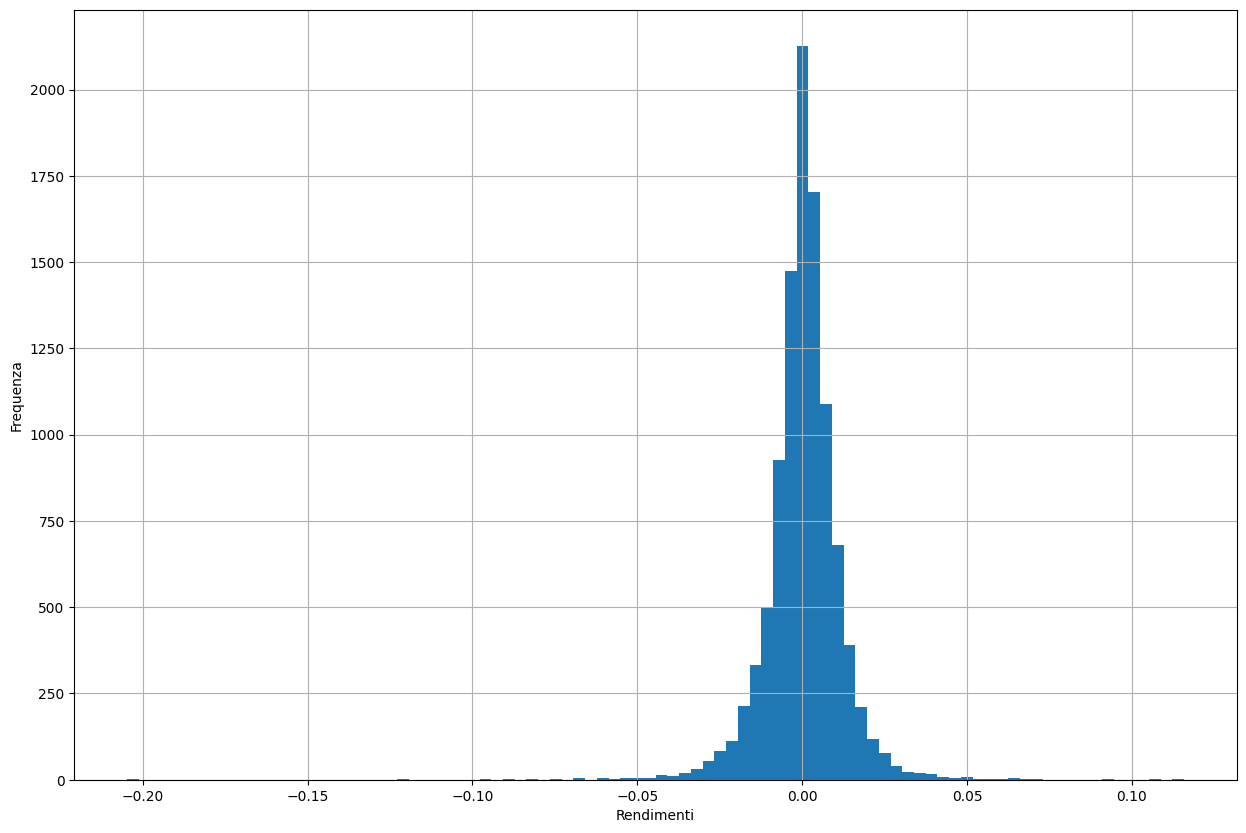

In [154]:
plt.figure(figsize=(15,10))
plt.hist(SP500['RS_Netto'], bins = 90)
plt.xlabel('Rendimenti')
plt.ylabel('Frequenza')
plt.grid()

TypeError: 'tuple' object is not callable

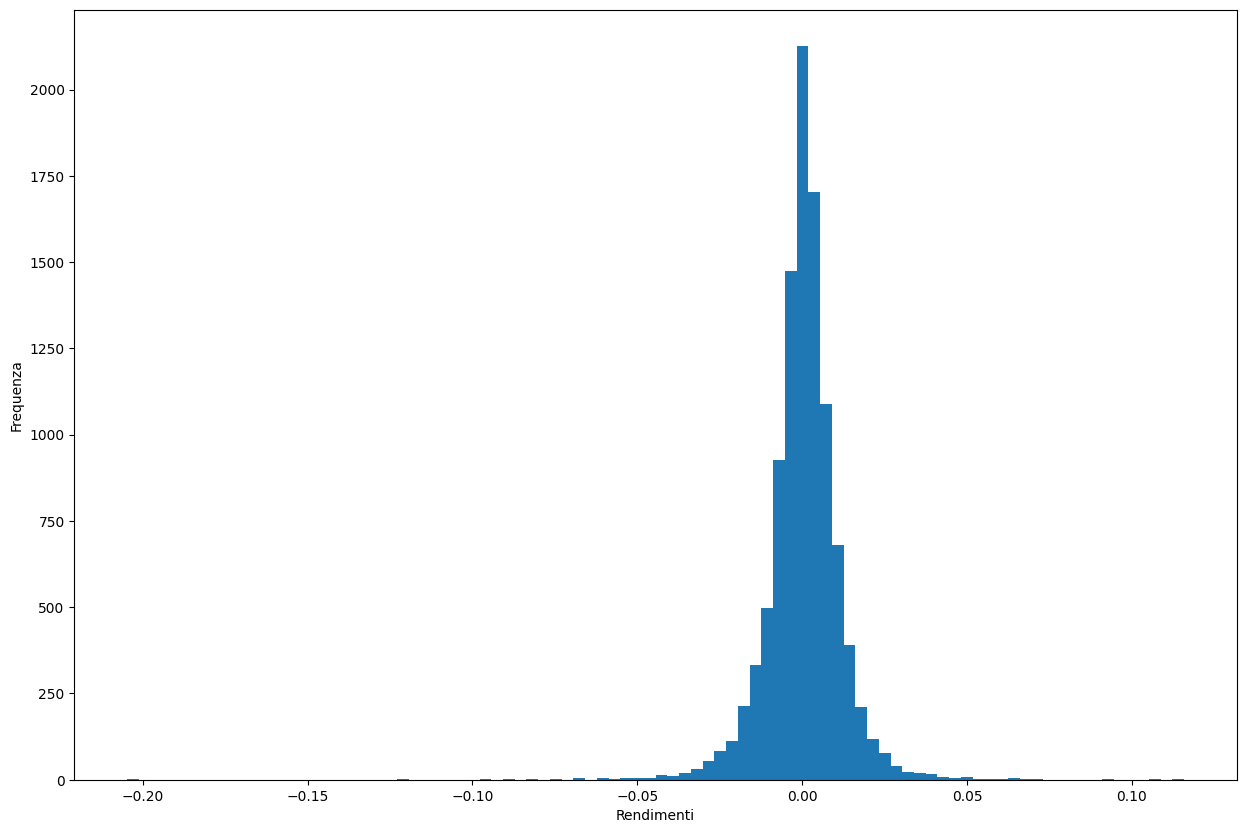

In [155]:
plt.figure(figsize=(15,10))
plt.hist(SP500['RS_Netto'], bins = 90)
plt.xlabel('Rendimenti')
plt.ylabel('Frequenza')
plt.ylim(0,10)
plt.grid()
plt.show()

In [ ]:
SP500['RS_Netto'].kurtosis(skipna = True)

In [ ]:
from scipy.stats import norm

In [ ]:
plt.hist(SP500['RS_Netto'], bins=90, density=True, alpha=0.7, color ='blue', label = 'Istogramma')
mu, std = np.mean(SP500['RS_Netto']), np.std(SP500['RS_Netto'])
xmin, xmax = plt.xlim()
#x = np.linspace(min(SP500['RS_Netto']),max(SP500['RS_Netto']), 100)
x = np.linspace(xmin,xmax, 100)
p = norm.pdf(x,mu,std)

plt.plot(x,p,'r',linewidth=2, label = 'Distribuzione normale')
plt.xlabel('Valore')
plt.ylabel('Frequenza')
plt.title('Istogramma dei rendimenti e distribuzione normale ')
plt.legend()
plt.grid()
plt.ylim(0,0.1)
plt.show()

__PER CAPIRE__: 
- il parametro `density = True` specifica se l'istogramma deve essere normalizzato in modo che l'area totale sottesa dall'istogramma sia 1; ciò è utile quando si confrontano istogrammi con un diverso numero di dati o bin.
- il parametro `alpha = 0.7` controlla la trasparenza dell'istogramma


#### Si verificano valori estremi negativi con maggiore frequenza di valori estremi positivi, perciò la distribuzione è asimmetrica (indice di asimmetria o "skew" minore di 0)

In [ ]:
len(SP500['RS_Netto'])

Numero di giorni lavorativi considerati normali in un anno

In [156]:
+len(SP500['RS_Netto'])/41


252.0731707317073

In [157]:
mu # media

0.00040619807265951705

In [158]:
std # deviazione standard

0.011375325090607506

In [159]:
val_neg_estr = SP500['RS_Netto'].loc[SP500['RS_Netto']<(mu-2.33*std), ] # filtra soltanto i valori estremi negativi (entro 2.33 volte la deviazione standard ci sono il 99% dei dati, 2.33 l'ha preso dalla tabella della normale)

In [160]:
len(val_neg_estr)

170

In [161]:
len(val_neg_estr)/len(SP500['RS_Netto'])

0.01644895984518626

In [162]:
np.sum(val_neg_estr)

-6.753144548193358

In [163]:
val_pos_estr = SP500['RS_Netto'].loc[SP500['RS_Netto']>(mu+2.33*std), ] # filtra soltanto i valori estremi positivi (entro 2.33 volte la deviazione standard ci sono il 99% dei dati, 2.33 l'ha preso dalla tabella della normale)

In [164]:
len(val_pos_estr)

134

In [165]:
len(val_pos_estr)/len(SP500['RS_Netto'])

0.012965650701499758

In [166]:
np.sum(val_pos_estr)

5.378760399755001

In [167]:
SP500['RS_Netto'].skew(skipna = True) # indice di asimmetria negativo -> la distribuzione è asimmetrica verso sinistra

-0.7501747167306718

#### La dimensione della volatilità dei rendimenti, misurata dalla deviazione standard, domina quella dei rendimenti

In [168]:
std/mu

28.00437977494423

__NB__: se la divisione tra deviazione standard e media fornisce un valore alto, allora significa che la variabilità dei dati è relativamente alta (cioè i dati sono molto dispersi intorno alla media, la deviazione standard è alta).

Per questo motivo nei modelli di rischio a breve termine non si tiene conto del rendimento.

Questo cambia man mano che allunghiamo l'orizzonte temporale, perché il rendimento aumenta linearmente ma la volatilità cresce con la radice quadrata del tempo.

In [169]:
SP500_w = SP500.groupby(pd.Grouper(freq='W')).last() #aggregazione settimanale
SP500_w.head()

,Open,High,Low,Close,Adj Close,Volume,RS_Netto
Date,,,,,,,
1983-01-02,140.339996,140.779999,140.270004,140.639999,140.639999,42110000,NaN
1983-01-09,145.270004,146.460007,145.149994,145.179993,145.179993,127290000,-0.000620
1983-01-16,145.720001,147.119995,145.720001,146.649994,146.649994,86480000,0.006313
1983-01-23,146.300003,146.300003,143.250000,143.850006,143.850006,77110000,-0.016679
1983-01-30,144.309998,145.470001,144.250000,144.509995,144.509995,89490000,0.001663


In [170]:
SP500_w['RS_Netto'] = SP500_w['Adj Close'].pct_change(1) # calcola il ritorno settimanale

In [171]:
mu_w = np.mean(SP500_w['RS_Netto'])
mu_w

0.00191480961042742

In [172]:
std_w = np.std(SP500_w['RS_Netto'])
std_w

0.022961209858623714

In [173]:
std_w/mu_w # valore minore a quello calcolato con aggregazione giornaliera

11.991380100446833

In [174]:
SP500_m = SP500.groupby(pd.Grouper(freq='ME')).last() #aggregazione mensile
SP500_m.head()

,Open,High,Low,Close,Adj Close,Volume,RS_Netto
Date,,,,,,,
1982-12-31,140.339996,140.779999,140.270004,140.639999,140.639999,42110000,NaN
1983-01-31,144.509995,145.300003,143.929993,145.300003,145.300003,67140000,0.005467
1983-02-28,149.740005,149.740005,147.809998,148.059998,148.059998,83750000,-0.011219
1983-03-31,153.410004,155.020004,152.860001,152.960007,152.960007,100570000,-0.002803
1983-04-30,162.970001,164.429993,162.720001,164.429993,164.429993,105750000,0.009083


In [175]:
SP500_m['RS_Netto'] = SP500_m['Adj Close'].pct_change(1)

In [176]:
mu_m = np.mean(SP500_m['RS_Netto'])
mu_m

0.008156658344535056

In [177]:
std_m = np.std(SP500_m['RS_Netto'])
std_m

0.04367213473173168

In [178]:
std_m/mu_m # valore minore a quello calcolato con aggregazione settimanale

5.354169917021462

In [179]:
SP500_q = SP500.groupby(pd.Grouper(freq='QE')).last() #aggregazione quadrimestrale
SP500_q.head()

,Open,High,Low,Close,Adj Close,Volume,RS_Netto
Date,,,,,,,
1982-12-31,140.339996,140.779999,140.270004,140.639999,140.639999,42110000,NaN
1983-03-31,153.410004,155.020004,152.860001,152.960007,152.960007,100570000,-0.002803
1983-06-30,167.639999,167.639999,167.639999,167.639999,167.639999,76310000,0.006001
1983-09-30,167.229996,167.229996,165.630005,166.070007,166.070007,70860000,-0.006936
1983-12-31,164.860001,165.050003,164.580002,164.929993,164.929993,71840000,0.000425


In [180]:
SP500_q['RS_Netto'] = SP500_q['Adj Close'].pct_change(1)

In [181]:
mu_q = np.mean(SP500_q['RS_Netto'])
mu_q

0.024978939435316865

In [182]:
std_q = np.std(SP500_q['RS_Netto'])
std_q

0.07982764840957766

In [183]:
std_q/mu_q # valore minore a quello calcolato con aggregazione mensile

3.1957981489282967

In [184]:
mu_y = mu*252 # 252 sono i giorni lavorativi in un anno
mu_y

0.1023619143101983

In [185]:
std_y = std*np.sqrt(252)
std_y

0.18057768763356447

In [186]:
std_y/mu_y # valore minore a quello calcolato con aggregazione quadrimestrale

1.7641101072645098

#### La varianza, la quale si può misurare attraverso il quadrato dei rendimenti, presenta autocorrelazione positiva con i valori passati

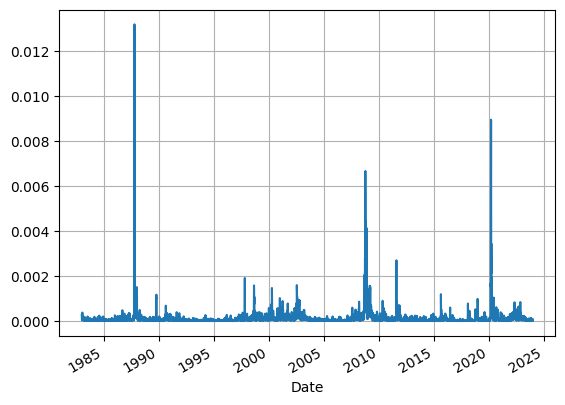

In [187]:
SP500['RS_Netto'].rolling(window=5).var().plot() # rolling permette di fare il conto su una finestra mobile di dati, in questo caso viene calcolata la varianza basata sui 5 punti precedenti
plt.grid()

__PER CAPIRE__: invece che calcolare la varianza (media degli scarti quadratici rispetto alla media) su tutti i dati precedenti, il calcolo viene fatto solo su una finestra di 5 dati (questo permette di vedere come la varianza cambia nel tempo).

In [188]:
SP500['RS_2']=SP500['RS_Netto']**2

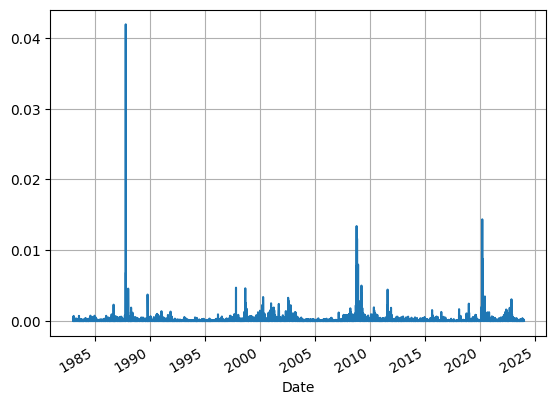

In [189]:
SP500['RS_2'].plot()
plt.ylim=(0,0.01)
plt.grid()

In [190]:
# TODO: chiedere a Candelieri perché la varianza si può misurare come rendimenti al quadrato, inoltre chiedere anche perché il grafico che ne risulta ha le stesse forme ma diversi valori

In [191]:
Autocorr_2 = []
for i in range(1,100):
    x = SP500['RS_2'].autocorr(lag=i)
    Autocorr_2.append(x)

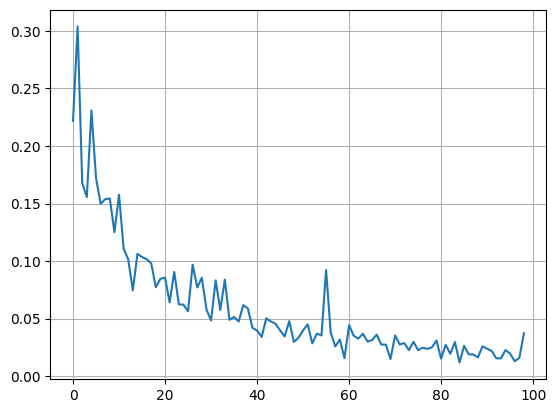

In [192]:
plt.plot(Autocorr_2)
plt.grid()

### Nel mercato azionario si riscontra una relazione negativa fra rendimenti e varianza, momenti di elevata volatilità sono associati a rendimenti negativi

In [193]:
start = datetime.date(2004,5,31)
end = datetime.date(2024,3,31)
sp500 = yf.download(['^GSPC'], start, end)

[*********************100%%**********************]  1 of 1 completed


In [194]:
sp500.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-06-01,1120.680054,1122.699951,1113.319946,1121.199951,1121.199951,1238000000
2004-06-02,1121.199951,1128.099976,1118.640015,1124.989990,1124.989990,1251700000
2004-06-03,1124.989990,1125.310059,1116.569946,1116.640015,1116.640015,1232400000
2004-06-04,1116.640015,1129.170044,1116.640015,1122.500000,1122.500000,1115300000
2004-06-07,1122.500000,1140.540039,1122.500000,1140.420044,1140.420044,1211800000


In [195]:
sp500 = sp500['Adj Close']
sp500.head()

Date
2004-06-01    1121.199951
2004-06-02    1124.989990
2004-06-03    1116.640015
2004-06-04    1122.500000
2004-06-07    1140.420044
Name: Adj Close, dtype: float64

In [196]:
sp500.name = 'SP500'
sp500

Date
2004-06-01    1121.199951
2004-06-02    1124.989990
2004-06-03    1116.640015
2004-06-04    1122.500000
2004-06-07    1140.420044
                 ...     
2024-03-22    5234.180176
2024-03-25    5218.189941
2024-03-26    5203.580078
2024-03-27    5248.490234
2024-03-28    5254.350098
Name: SP500, Length: 4991, dtype: float64

In [197]:
vix = yf.download(['^VIX'], start, end) #  VIX è un indice di borsa che utilizza i prezzi delle opzioni per misurare l'aspettativa dei trader riguardo alla volatilità futura del mercato azionario

[*********************100%%**********************]  1 of 1 completed


In [198]:
vix = vix['Adj Close']
vix.head()

Date
2004-06-01    16.299999
2004-06-02    16.080000
2004-06-03    17.030001
2004-06-04    16.780001
2004-06-07    15.390000
Name: Adj Close, dtype: float64

In [199]:
vix.name = 'VIX'

In [200]:
sp500_vix = pd.concat([sp500, vix], axis = 1) 
sp500_vix.head()

,SP500,VIX
Date,,
2004-06-01,1121.199951,16.299999
2004-06-02,1124.989990,16.080000
2004-06-03,1116.640015,17.030001
2004-06-04,1122.500000,16.780001
2004-06-07,1140.420044,15.390000


In [201]:
sp500_vix.rename(columns={'Adj Close' : 'SP500','Adj Close' : 'VIX'}, inplace = True) 
sp500_vix.head()

,SP500,VIX
Date,,
2004-06-01,1121.199951,16.299999
2004-06-02,1124.989990,16.080000
2004-06-03,1116.640015,17.030001
2004-06-04,1122.500000,16.780001
2004-06-07,1140.420044,15.390000


array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

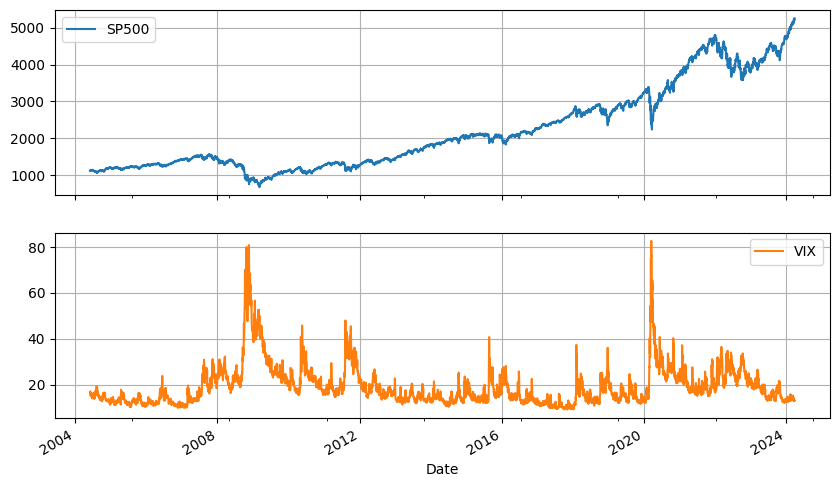

In [202]:
sp500_vix.plot(subplots=True, figsize=(10,6), grid = True)

<Axes: xlabel='Date'>

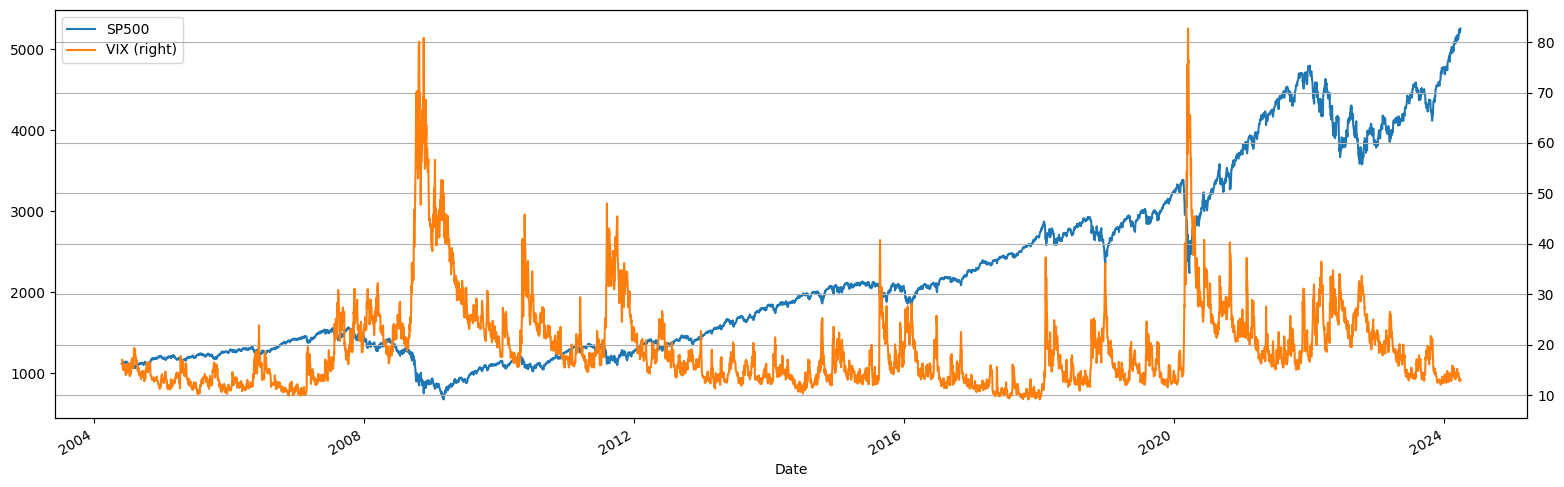

In [203]:
sp500_vix.plot(secondary_y = 'VIX', figsize=(19,6), grid = True)

In [204]:
rets = np.log(sp500_vix/sp500_vix.shift(1)) # calcola i ritorni logaritmici
rets.head()

,SP500,VIX
Date,,
2004-06-01,NaN,NaN
2004-06-02,0.003375,-0.013589
2004-06-03,-0.007450,0.057400
2004-06-04,0.005234,-0.014789
2004-06-07,0.015838,-0.086470


In [205]:
rets.dropna(inplace = True)
rets

,SP500,VIX
Date,,
2004-06-02,0.003375,-0.013589
2004-06-03,-0.007450,0.057400
2004-06-04,0.005234,-0.014789
2004-06-07,0.015838,-0.086470
2004-06-08,0.001542,-0.025001
...,...,...
2024-03-22,-0.001403,0.010778
2024-03-25,-0.003060,0.009905
2024-03-26,-0.002804,0.003784


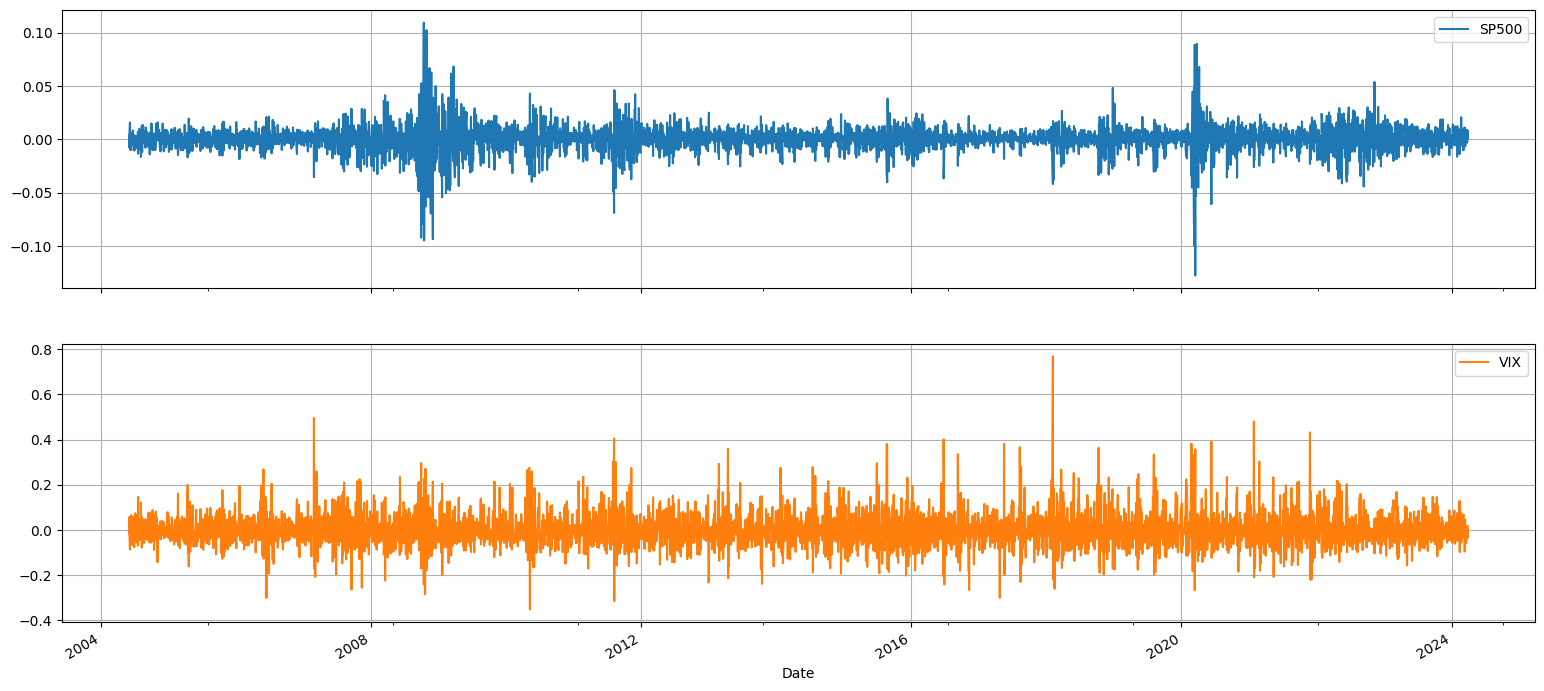

In [206]:
rets.plot(subplots=True, grid=True, figsize=(19,9));

Correlazione fra SP500 e VIX

In [207]:
rets.corr() # correlazione significativa verso -1, quindi relazione inversa tra i due

,SP500,VIX
SP500,1.000000,-0.730909
VIX,-0.730909,1.000000


Evidenziamo la correlazione negativa fra rendimenti del S&P500 e variazioni del VIX

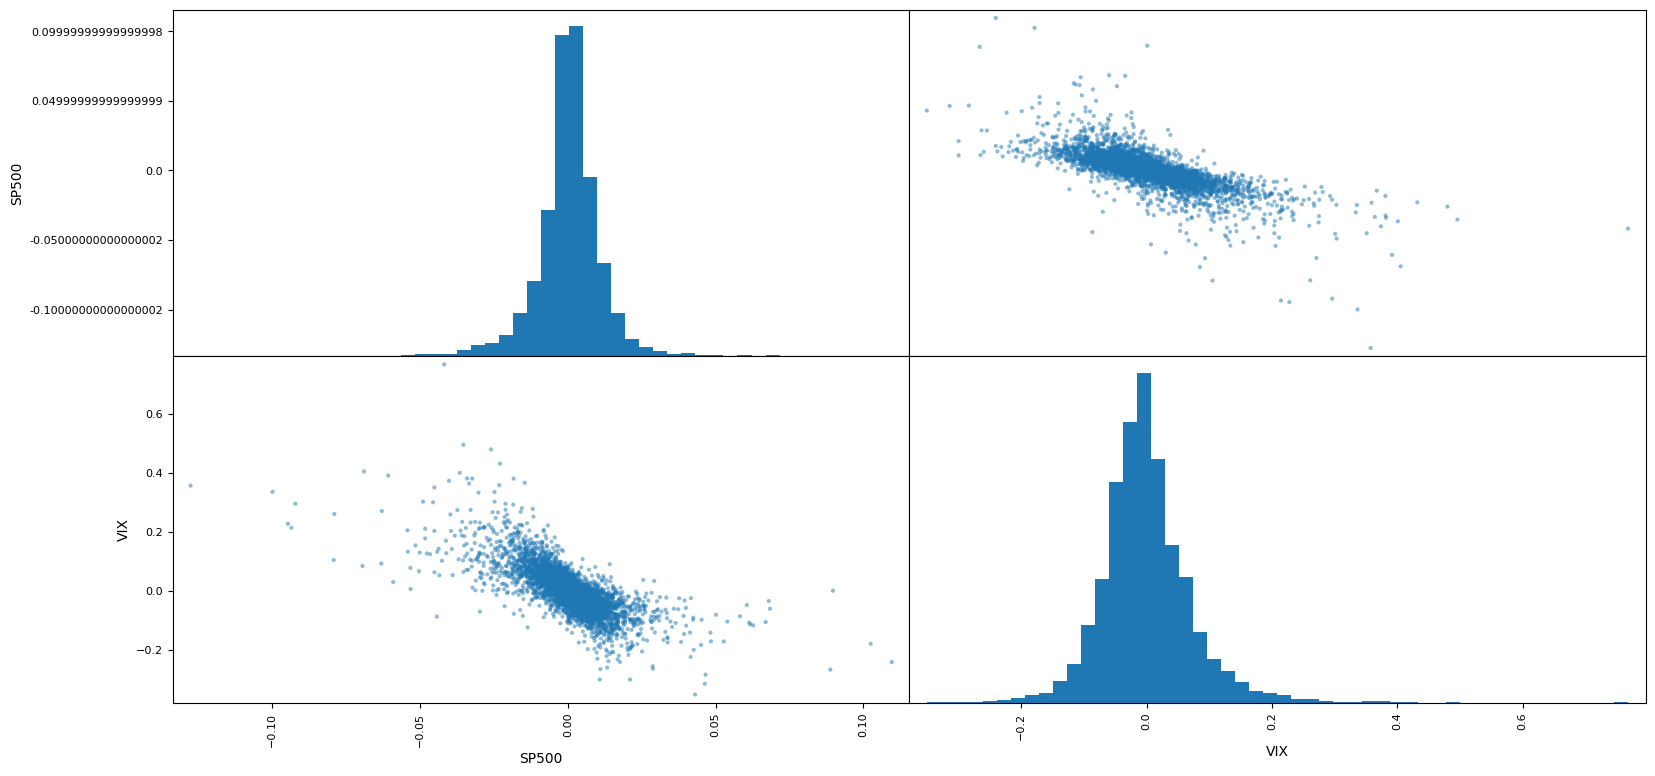

In [208]:
pd.plotting.scatter_matrix(rets, alpha = 0.5,
                           diagonal = 'hist',
                           hist_kwds = {'bins': 50},
                           figsize = (19,9), grid = True);

Stimiamo la relazione lineare fra i due

In [209]:
reg = np.polyfit(rets['SP500'],rets['VIX'], deg = 1)

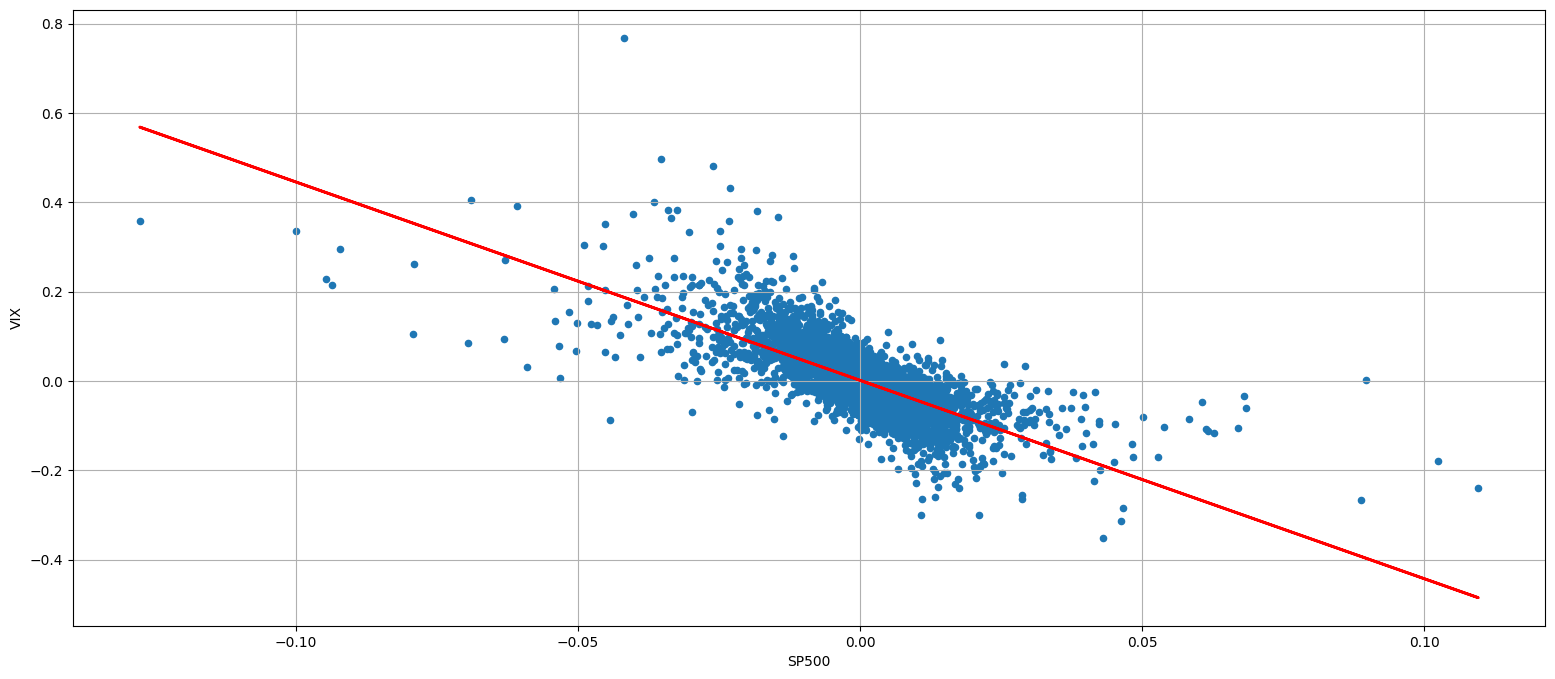

In [210]:
ax = rets.plot(kind = 'scatter', x = 'SP500', y= 'VIX', figsize=(19,8))
ax.plot(rets['SP500'], np.polyval(reg, rets['SP500']), 'r', lw=2)
plt.grid();

Evoluzione nel tempo della correlazione

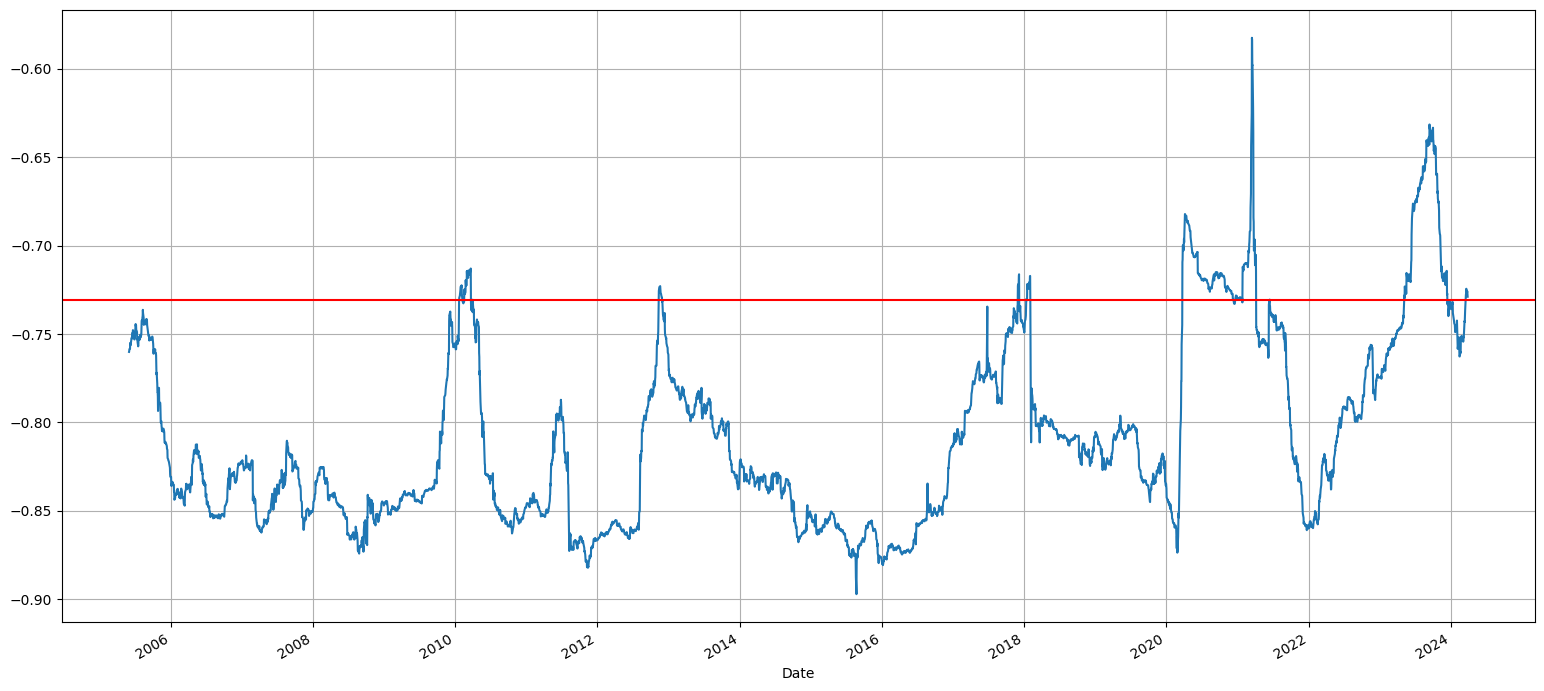

In [211]:
ax = rets['SP500'].rolling(window=252).corr(rets['VIX']).plot(figsize=(19,9))
ax.axhline(rets.corr().iloc[0,1], c='r')
plt.grid()

VIX e volatilità

In [212]:
sp500_vix.head(22)

,SP500,VIX
Date,,
2004-06-01,1121.199951,16.299999
2004-06-02,1124.989990,16.080000
2004-06-03,1116.640015,17.030001
2004-06-04,1122.500000,16.780001
2004-06-07,1140.420044,15.390000
2004-06-08,1142.180054,15.010000
2004-06-09,1131.329956,15.390000
2004-06-10,1136.469971,15.040000
2004-06-14,1125.290039,16.070000


In [213]:
sp500_vix.head()

,SP500,VIX
Date,,
2004-06-01,1121.199951,16.299999
2004-06-02,1124.989990,16.080000
2004-06-03,1116.640015,17.030001
2004-06-04,1122.500000,16.780001
2004-06-07,1140.420044,15.390000


In [214]:
sp500_vix['SP500_ret']=sp500_vix['SP500']/sp500_vix['SP500'].shift(1)

In [215]:
sp500_vix.head()

,SP500,VIX,SP500_ret
Date,,,
2004-06-01,1121.199951,16.299999,NaN
2004-06-02,1124.989990,16.080000,1.003380
2004-06-03,1116.640015,17.030001,0.992578
2004-06-04,1122.500000,16.780001,1.005248
2004-06-07,1140.420044,15.390000,1.015964


In [216]:
sp500_vix['Vola'] = sp500_vix['SP500_ret'].rolling(window = 22).std()*np.sqrt(252)*100 # 252 giorni lavorativi in un anno, 22 giorni lavorativi in un mese TODO: CHIEDERE CONFERMA

__PER CAPIRE__: questo comando calcola la deviazione standard dei rendimenti giornalieri su una finestra di un mese lavorativo (22 giorni), dopodiché normalizza la volatilità su base annua per poter effettuare i giusti confronti (lo fa moltiplicando per la radice di 252) ed infine trasforma tutto su base percentuale.

In [217]:
sp500_vix.head(25)

,SP500,VIX,SP500_ret,Vola
Date,,,,
2004-06-01,1121.199951,16.299999,NaN,NaN
2004-06-02,1124.989990,16.080000,1.003380,NaN
2004-06-03,1116.640015,17.030001,0.992578,NaN
2004-06-04,1122.500000,16.780001,1.005248,NaN
2004-06-07,1140.420044,15.390000,1.015964,NaN
2004-06-08,1142.180054,15.010000,1.001543,NaN
2004-06-09,1131.329956,15.390000,0.990501,NaN
2004-06-10,1136.469971,15.040000,1.004543,NaN
2004-06-14,1125.290039,16.070000,0.990163,NaN


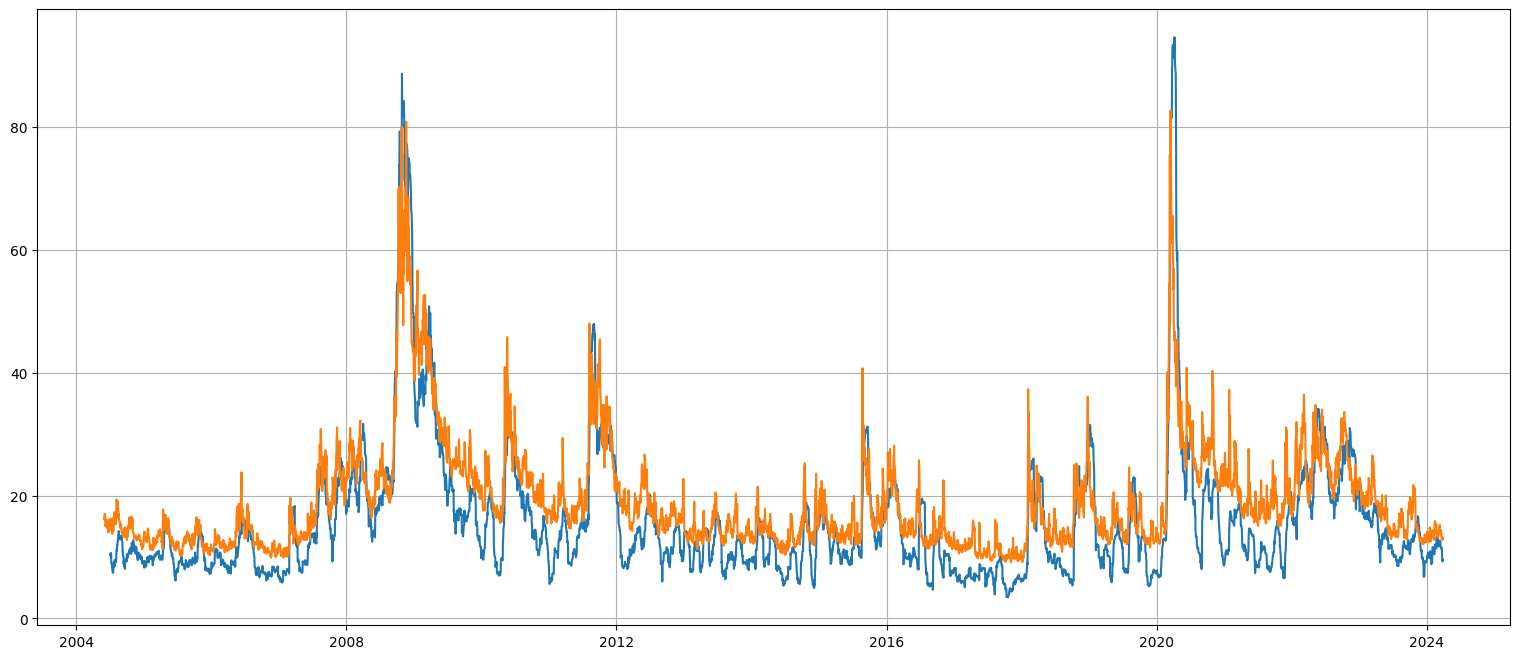

In [218]:
plt.figure(figsize = (19,8))
plt.plot(sp500_vix['Vola'])
plt.plot(sp500_vix['VIX'])
plt.grid();

In [219]:
np.mean(sp500_vix['Vola'])

15.802717050576469

In [220]:
np.mean(sp500_vix['VIX'])

19.13195752209018